In [2]:
#https://www.kaggle.com/datasets/mirichoi0218/insurance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/insurance_kaggle_regression.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

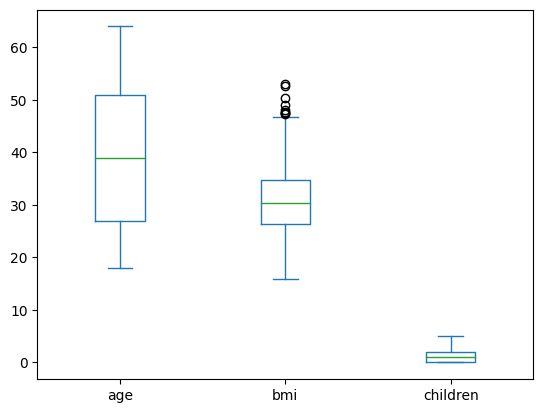

In [6]:
#Outliers

dataset.drop(columns=['charges']).plot(kind='box')

In [7]:
1.5 * dataset.quantile(0.25) 

age           40.500000
bmi           39.444375
children       0.000000
charges     7110.430725
Name: 0.25, dtype: float64

In [8]:
#Outlier treatment using IQR method

q1 = dataset.quantile(0.25) 
q3 = dataset.quantile(0.75) 
iqr = q3-q1
iqr_pos = q3 + 1.5 * iqr
iqr_neg = q1 - 1.5 * iqr

print(iqr_pos)
print(iqr_neg)


age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64
age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64


In [9]:

dataset['bmi'] = np.where(dataset['bmi']>iqr_pos['bmi'], iqr_pos['bmi'], 
                     np.where(dataset['bmi']<iqr_neg['bmi'], iqr_neg['bmi'], dataset['bmi']))



<Axes: >

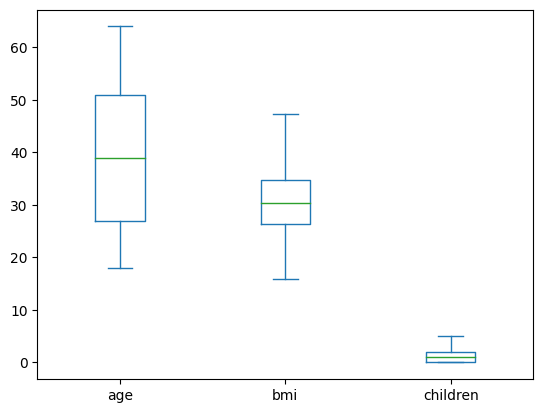

In [10]:
dataset.drop(columns=['charges']).plot(kind='box')

In [11]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Handling categorical values

dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,13270.422265
std,14.049960,6.056926,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,63770.428010


In [13]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
dataset['sex'] = dataset['sex'].astype('category').cat.codes
dataset['smoker'] = dataset['smoker'].astype('category').cat.codes

In [17]:
dataset = pd.get_dummies(dataset, columns=['region'])
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [18]:
dataset.drop(columns=['region_southwest'], inplace=True)
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast'],
      dtype='object')

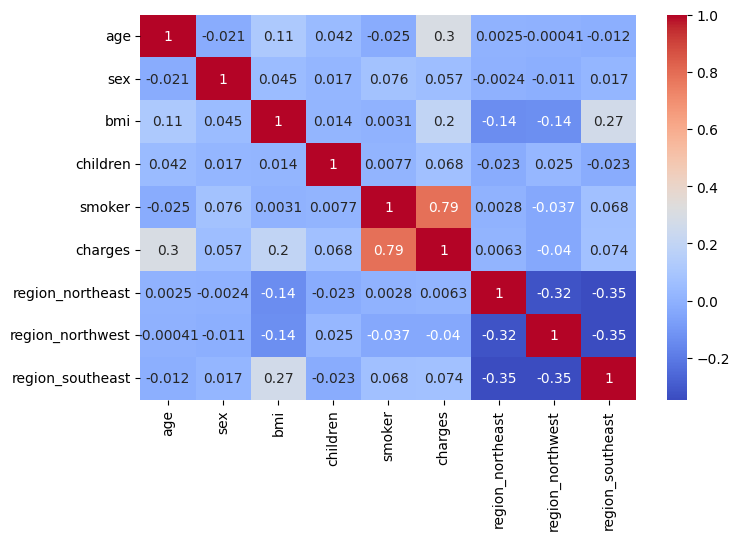

In [24]:
plt.figure(figsize=(8,5))
correlation = dataset.corr()
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')
plt.show()

In [25]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


In [26]:
#Variance inflation factor
# Splitting the data into dependent and independent variables

x = dataset.drop(columns=['charges'])
y = dataset['charges']

In [27]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,0,0,0
1,18,1,33.770,1,0,0,0,1
2,28,1,33.000,3,0,0,0,1
3,33,1,22.705,0,0,0,1,0
4,32,1,28.880,0,0,0,1,0


In [28]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [32]:
x.shape[1]

8

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x
vif_ds = pd.DataFrame()
vif_ds['vif'] = [ variance_inflation_factor(variable, i) for i in range(variable.shape[1]) ]
vif_ds['columns'] = variable.columns

vif_ds

,vif,columns
0,7.819171,age
1,2.005775,sex
2,10.768677,bmi
3,1.806764,children
4,1.264370,smoker
5,1.830352,region_northeast
6,1.831712,region_northwest
7,2.169381,region_southeast


In [35]:
new_df = pd.DataFrame()
new_df = variable.drop(columns=['bmi'], axis=1)
new_df

,age,sex,children,smoker,region_northeast,region_northwest,region_southeast
0,19,0,0,1,0,0,0
1,18,1,1,0,0,0,1
2,28,1,3,0,0,0,1
3,33,1,0,0,0,1,0
4,32,1,0,0,0,1,0
...,...,...,...,...,...,...,...
1333,50,1,3,0,0,1,0
1334,18,0,0,0,1,0,0
1335,18,0,0,0,0,0,1
1336,21,0,0,0,0,0,0


In [36]:
variable = new_df
vif_ds = pd.DataFrame()
vif_ds['vif'] = [ variance_inflation_factor(variable, i) for i in range(variable.shape[1]) ]
vif_ds['columns'] = variable.columns

In [37]:
vif_ds

,vif,columns
0,3.861521,age
1,1.885624,sex
2,1.747329,children
3,1.255923,smoker
4,1.696231,region_northeast
5,1.696902,region_northwest
6,1.792161,region_southeast


### Splitting the data for train and test   

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=26)


### Model building

In [40]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [41]:
print(linearModel.intercept_)
print(linearModel.coef_)

-13268.296139095706
[  247.09822011    40.01936345   360.39860569   377.43619865
 23941.95301383  1089.51043282   933.1067664   -390.30186883]


In [42]:
y_pred_test = linearModel.predict(x_test)
print(y_pred_test)

[ 4307.93482762   328.41560357  5108.18258349  3705.70623196
 12270.79552485 34681.11780196 14762.72670801 33827.45000065
 -1870.01589116  9858.51478984 30531.8742011   9917.47384441
 24017.16906881 38992.01593022  6312.21283547  6304.46053644
 15098.74268056  6495.49153833 10914.03915701 14607.24272267
  9062.71679116 10912.99314336  9422.1596033   8178.09007739
 10757.72224258  -552.18433063 17660.49502989  4158.15103395
 25660.64861299 25494.52257576  2750.04872638  5325.1663994
 14286.68718641 11780.81695321 30901.25142901 15020.55541941
  5978.1571898  12082.39877081 27500.64566821  9255.01593555
  7529.67880747 14096.05237244 37719.58418538 30563.80796712
 10886.94795733 25088.90397896  7802.36743236 11194.6359598
 36176.40883892 36897.5058895   7867.63282799  4304.26792621
 10953.90927868  4213.49274917  3616.8067817  34076.86740556
 10453.1904494  12832.1967638  10746.53518934  3237.71331147
  4585.22857995  6047.90914253  7408.36280181 34356.39630193
 14936.22374099  7283.4313

In [43]:
y_pred_train = linearModel.predict(x_train)

In [44]:
from sklearn.metrics import r2_score
print('Training accuracy')
r2_score(y_train, y_pred_train)

Training accuracy


0.7554492440586658

In [45]:
print('Testing accuracy')
r2_score(y_test, y_pred_test)

Testing accuracy


0.7310915323637053

Text(0, 0.5, 'Predicted')

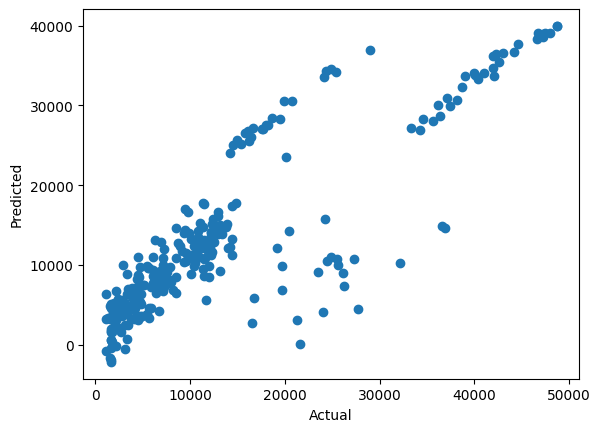

In [48]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Approach 2: OLS method

In [51]:
from statsmodels.regression.linear_model import OLS

ols = OLS(endog=y_train, exog=x_train).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              935.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:18:30   Log-Likelihood:                         -10881.
No. Observations:                1070   AIC:                                  2.178e+04
Df Residuals:                    1062   BIC:                                  2.182e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                190.9478     13.025     14.660      0.000     165.391     216.505
sex               -564.2039    385.430     -1.464      0.144   -1320.495     192.087
bmi                 63.7516     20.041      3.181      0.002      24.427     103.076
children           172.1201    158.711      1.084      0.278    -139.303     483.543
smoker            2.348e+04    480.577     48.859      0.000    2.25e+04    2.44e+04
region_northeast  -545.0763    537.096     -1.015      0.310   -1598.967     508.814
region_northwest  -865.9900    527.941     -1.640      0.101   -1901.917     169.937
region_southeast -1039.7867    542.258     -1.918      0.055   -2103.806      24.232
==============================================================================
Omnibus:                      232.770   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.502
Skew:                           1.155   Prob(JB):                    2.16e-124
Kurtosis:                       5.727   Cond. No.                         198.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

In [52]:
from sklearn.linear_model import Lasso

lassoModel = Lasso(alpha=0.1)
lassoModel.fit(x_train, y_train)
print('Lasso model : ', lassoModel.coef_)

Lasso model :  [  247.09877092    39.66636348   360.37958902   377.38726057
 23941.33169388  1088.68059773   932.26344583  -390.25373207]


In [54]:
y_pred_train_lasso = lassoModel.predict(x_train)
y_pred_test_lasso = lassoModel.predict(x_test)

print('Lasso model - training accuracy: ', r2_score(y_train, y_pred_train_lasso))
print('Lasso model - testing accuracy: ', r2_score(y_test,y_pred_test_lasso))


Lasso model - training accuracy:  0.7554492421579438
Lasso model - testing accuracy:  0.7310977682548055


In [55]:
from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha=0.3)
ridgeModel.fit(x_train, y_train)
print('Ridge model: ', ridgeModel.coef_)

Ridge model:  [  247.08567159    42.7330022    360.29105466   377.28697982
 23900.36961234  1086.94255614   929.82693264  -388.73176871]


In [56]:
y_pred_test_ridge = ridgeModel.predict(x_test)
y_pred_train_ridge = ridgeModel.predict(x_train)

print('Ridge model - testing accuracy: ', r2_score(y_test, y_pred_test_ridge))
print('Ridge model - training accuracy: ', r2_score(y_train, y_pred_train_ridge))


Ridge model - testing accuracy:  0.7311399287837316
Ridge model - training accuracy:  0.7554473082178668


In [57]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.3, l1_ratio=0.1)
enet.fit(x_train, y_train)

y_pred_test_enet = enet.predict(x_test)
y_pred_train_enet = enet.predict(x_train)
print('Ridge model - testing accuracy: ', r2_score(y_test, y_pred_test_enet))
print('Ridge model - training accuracy: ', r2_score(y_train, y_pred_train_enet))

Ridge model - testing accuracy:  0.511820015341766
Ridge model - training accuracy:  0.5048218039375194


In [61]:
from sklearn import metrics

print('Mean absolute error :', metrics.mean_absolute_error(y_test, y_pred_test))

Mean absolute error : 4456.178989213899


In [62]:
print("Mean absolute percent error :",metrics.mean_absolute_error(y_test, y_pred_test)/100)

Mean absolute percent error : 44.56178989213899


In [63]:
print("Mean squared error :",metrics.mean_squared_error(y_test, y_pred_test))

Mean squared error : 41196645.41350537


In [64]:
print("Root mean squared error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root mean squared error : 6418.461296409395


### Gradient descent 

In [65]:
from sklearn.linear_model import SGDRegressor

gdModel = SGDRegressor()
gdModel.fit(x_train, y_train)

y_pred_test_gd = gdModel.predict(x_test)
y_pred_train_gd = gdModel.predict(x_train)

print('Ridge model - testing accuracy: ', r2_score(y_test, y_pred_test_gd))
print('Ridge model - training accuracy: ', r2_score(y_train, y_pred_train_gd))

Ridge model - testing accuracy:  -7174232599.498136
Ridge model - training accuracy:  -7567269931.0940485
